INTRODUZIONE

L'esperienza svolta in laboratorio consiste nell'analisi del moto del pendolo, focalizzandosi principalmente sulle grandezze da cui dipende il periodo di oscillazione. L'esperienza consiste in due parti:

• Verificare che il periodo di oscillazione del pendolo dipende dalla lunghezza del braccio del pendolo e non dalla massa

• Trovare la miglior stima dell'accelerazione gravitazionale


Informazioni teoriche:

L'unica formula utilizzata per l'esperienza è:
$T = 2\pi\sqrt{\frac{L}{g}}$ , dove T indica il periodo, L la lunghezza del filo e g l'accelerazione gravitazionale


STRUMENTAZIONI E MATERIALE

Per l'esperienza sono stati utilizzati:

• Bilancia con sensibilità 0,1 grammi

• Goniometro a muro con sensibilità 1 grado

• 3 pesi con massa differente

• Filo inestensibile

• Cronometro con sensibilità 0,01 secondi

• Metro con sensibilità 0,001 metri

METODOLOGIA USATA

Per la prima parte dell'esperienza con l'ausilio della bilancia sono state stabilite le masse dei tre pesi e con il metro abbiamo tagliato 3 pezzi di filo della stessa lunghezza con cui abbiamo costruito 3 pendoli con bracci uguali al fine di verificare che il periodo di oscillazione del pendolo non dipendesse dalla massa. Per quanto riguarda l'inclinazione da cui far partire il pendolo è stato scelto un angolo che, per l'approssimazione dei piccoli angoli e per la sensibilità del goniometro, abbia un errore più piccolo rispetto all' errore percentuale del cronometro.Abbiamo fatto diversi tentativi che hanno portato all' escludere un angolo di 10° e alla conclusione che l'angolo con l'errore ideale fosse di 5°.
Il metodo utilizzato per misurare il periodo di oscillazione dei pendoli è quello di misurare il tempo di 11 oscillazioni del pendolo sottraendo il tempo della prima oscillazione. Questa scelta è dovuta dal fatto che, poiché il pendolo viene tenuto in mano prima del rilascio, la prima oscillazione è condizionata dalla spinta che viene conferita al pendolo dalla mano dell' osservatore al momento del rilascio, inoltre questa spinta va a compensare l'attrito dell'aria ponendo così il moto del pendolo in una situazione quasi ideale per la misura del periodo. Una volta trovate le misure del periodo,  andrà verificata l'indipendenza del periodo dell'oscillazione dalla massa del pendolo.
Per verificare la dipendenza del periodo dalla lunghezza abbiamo utilizzato il peso con la massa più piccola e abbiamo misurato, con lo stesso metodo usato prima, il periodo di oscillazione utilizzando due bracci di lunghezza differente.

Per la seconda parte dell'esperienza abbiamo utilizzato i dati raccolti dalla prima parte relativi al periodo di oscillazione e alla massa di un peso e abbiamo inserito i dati nella formula che ci è stata fornita: $T = 2\pi\sqrt{\frac{l}{g}}$

In [15]:
#Librerie utilizzate
from sympy import symbols, diff
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.misc import derivative
import math
from scipy.optimize import curve_fit
from scipy.stats import chi2
k = symbols('k')
#Valori masse,

#bullone=m1, ruota=m2, massa con 2 ganci=m3

In [16]:
#ARRAY

#lunghezze
l1m3= np.array([0.811, 0.810, 0.814, 0.813, 0.812])
l2m3= np.array([0.441, 0.443, 0.442, 0.445, 0.443])
l3m1= np.array([0.447, 0.448, 0.446, 0.447, 0.448])
l4m2= np.array([0.445, 0.446, 0.445, 0.447, 0.446])
#periodi
T1m3= np.array([1.81, 1.81, 1.80, 1.80, 1.81])
T2m3= np.array([1.33, 1.32, 1.33, 1.33, 1.32])
T3m1= np.array([1.34, 1.34, 1.35, 1.34, 1.31])
T4m2= np.array([1.34, 1.34, 1.34, 1.35, 1.32])

data1 = {
    'l1m3': ['0.81m' ,'0.810m','0.814m','0.813m', '0.812m'],
    'l2m3': ['0.441m','0.443m', '0.442m', '0.445m', '0.443m'],
    'l3m1': ['0.447m','0.448m', '0.446m','0.447m','0.448m'],
    'l4m2': ['0.445m', '0.446m','0.445m', '0.447m', '0.446m'],
}
data2 = {
    'T1m3': ['1.81s' ,'1.81s','1.80s','1.80s', '1.81s'],
    'T2m3': ['1.33s','1.32s', '1.33s', '1.33s', '1.32s'],
    'T3m1': ['1.34s','1.34s', '1.35s','1.34s','1.31s'],
    'T4m2': ['1.34s', '1.34s','1.34s', '1.35s', '1.32s'],
}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
print(df1)
print(df2)

     l1m3    l2m3    l3m1    l4m2
0   0.81m  0.441m  0.447m  0.445m
1  0.810m  0.443m  0.448m  0.446m
2  0.814m  0.442m  0.446m  0.445m
3  0.813m  0.445m  0.447m  0.447m
4  0.812m  0.443m  0.448m  0.446m
    T1m3   T2m3   T3m1   T4m2
0  1.81s  1.33s  1.34s  1.34s
1  1.81s  1.32s  1.34s  1.34s
2  1.80s  1.33s  1.35s  1.34s
3  1.80s  1.33s  1.34s  1.35s
4  1.81s  1.32s  1.31s  1.32s


In [17]:
#CALCOLO di media, SD, SDOM, Er% delle LUNGHEZZE

#media
l1m3_med=np.mean(l1m3)
l2m3_med=np.mean(l2m3)
l3m1_med=np.mean(l3m1)
l4m2_med=np.mean(l4m2)
#sd
l1m3_SD=np.std(l1m3)
l2m3_SD=np.std(l2m3)
l3m1_SD=np.std(l3m1)
l4m2_SD=np.std(l4m2)
#sdom
l1m3_SDOM=(l1m3_SD/np.sqrt(len(l1m3)))
l2m3_SDOM=(l2m3_SD/np.sqrt(len(l2m3)))
l3m1_SDOM=(l3m1_SD/np.sqrt(len(l3m1)))
l4m2_SDOM=(l4m2_SD/np.sqrt(len(l4m2)))
#er_SDOM
er_l1m3=((l1m3_SDOM/l1m3_med)*100)
er_l2m3=((l2m3_SDOM/l2m3_med)*100)
er_l3m1=((l3m1_SDOM/l3m1_med)*100)
er_l4m2=((l4m2_SDOM/l4m2_med)*100)

data = {
    'media': [l1m3_med, l2m3_med, l3m1_med, l4m2_med],
    'sd': [l1m3_SD, l2m3_SD, l3m1_SD, l4m2_SD],
    'sdom': [l1m3_SDOM, l2m3_SDOM, l3m1_SDOM, l4m2_SDOM],
    'er_SDOM': [er_l1m3, er_l2m3, er_l3m1, er_l4m2]
}


df = pd.DataFrame(data)
print(df)

    media        sd      sdom   er_SDOM
0  0.8120  0.001414  0.000632  0.077889
1  0.4428  0.001327  0.000593  0.133987
2  0.4472  0.000748  0.000335  0.074835
3  0.4458  0.000748  0.000335  0.075070


In [18]:
#CALCOLO di media, SD, SDOM, Er% dei PERIODI
T1m3_med= np.mean(T1m3)
T2m3_med= np.mean(T2m3)
T3m1_med= np.mean(T3m1)
T4m2_med= np.mean(T4m2)
#sd
T1m3_SD=np.std(T1m3)
T2m3_SD=np.std(T2m3)
T3m1_SD=np.std(T3m1)
T4m2_SD=np.std(T4m2)
#sdom
T1m3_SDOM=(T1m3_SD/np.sqrt(len(T1m3)))
T2m3_SDOM=(T2m3_SD/np.sqrt(len(T2m3)))
T3m1_SDOM=(T3m1_SD/np.sqrt(len(T3m1)))
T4m2_SDOM=(T4m2_SD/np.sqrt(len(T4m2)))
#er_SDOM
er_T1m3=((T1m3_SDOM/T1m3_med)*100)
er_T2m3=((T2m3_SDOM/T2m3_med)*100)
er_T3m1=((T3m1_SDOM/T3m1_med)*100)
er_T4m2=((T4m2_SDOM/T4m2_med)*100)
data = {
    'media': [T1m3_med, T2m3_med, T3m1_med, T4m2_med],
    'sd': [T1m3_SD, T2m3_SD, T3m1_SD, T4m2_SD],
    'sdom': [T1m3_SDOM, T2m3_SDOM, T3m1_SDOM, T4m2_SDOM],
    'er_SDOM': [er_T1m3, er_T2m3, er_T3m1, er_T4m2]
}
df = pd.DataFrame(data)
print(df)

   media        sd      sdom   er_SDOM
0  1.806  0.004899  0.002191  0.121312
1  1.326  0.004899  0.002191  0.165226
2  1.336  0.013565  0.006066  0.454064
3  1.338  0.009798  0.004382  0.327487


In [19]:
#10°
#periodi
T1m3_10= np.array([1.63, 1.62, 1.61, 1.63, 1.63])
T2m3_10= np.array([1.29, 1.32, 1.30, 1.29, 1.30])
T3m1_10= np.array([1.32, 1.32, 1.32, 1.34, 1.33])
T4m2_10= np.array([1.30, 1.34, 1.33, 1.32, 1.33])
data2_10 = {
    'T1m3_10': ['1.63s' ,'1.62s','1.61s','1.63s', '1.63s'],
    'T2m3_10': ['1.29s','1.32s', '1.30s', '1.29s', '1.30s'],
    'T3m1_10': ['1.32s','1.32s', '1.32s','1.34s','1.33s'],
    'T4m2_10': ['1.30s', '1.34s','1.33s', '1.32s', '1.33s'],
}
df2_10 = pd.DataFrame(data2_10)
print(df2_10)

  T1m3_10 T2m3_10 T3m1_10 T4m2_10
0   1.63s   1.29s   1.32s   1.30s
1   1.62s   1.32s   1.32s   1.34s
2   1.61s   1.30s   1.32s   1.33s
3   1.63s   1.29s   1.34s   1.32s
4   1.63s   1.30s   1.33s   1.33s


In [20]:
#CALCOLO di media, SD, SDOM, Er% dei PERIODI(angolo 10°)
T1m3_med_10= np.mean(T1m3_10)
T2m3_med_10= np.mean(T2m3_10)
T3m1_med_10= np.mean(T3m1_10)
T4m2_med_10= np.mean(T4m2_10)
#sd
T1m3_SD_10=np.std(T1m3_10)
T2m3_SD_10=np.std(T2m3_10)
T3m1_SD_10=np.std(T3m1_10)
T4m2_SD_10=np.std(T4m2_10)
#sdom
T1m3_SDOM_10=(T1m3_SD_10/np.sqrt(len(T1m3_10)))
T2m3_SDOM_10=(T2m3_SD_10/np.sqrt(len(T2m3_10)))
T3m1_SDOM_10=(T3m1_SD_10/np.sqrt(len(T3m1_10)))
T4m2_SDOM_10=(T4m2_SD_10/np.sqrt(len(T4m2_10)))
#er_SDOM
er_T1m3_10=((T1m3_SDOM_10/T1m3_med_10)*100)
er_T2m3_10=((T2m3_SDOM_10/T2m3_med_10)*100)
er_T3m1_10=((T3m1_SDOM_10/T3m1_med_10)*100)
er_T4m2_10=((T4m2_SDOM_10/T4m2_med_10)*100)
data = {
    'media': [T1m3_med_10, T2m3_med_10, T3m1_med_10, T4m2_med_10],
    'sd': [T1m3_SD_10, T2m3_SD_10, T3m1_SD_10, T4m2_SD_10],
    'sdom': [T1m3_SDOM_10, T2m3_SDOM_10, T3m1_SDOM_10, T4m2_SDOM_10],
    'er_SDOM': [er_T1m3_10, er_T2m3_10, er_T3m1_10, er_T4m2_10]
}
df = pd.DataFrame(data)
print(df)

   media        sd      sdom   er_SDOM
0  1.624  0.008000  0.003578  0.220302
1  1.300  0.010954  0.004899  0.376845
2  1.326  0.008000  0.003578  0.269812
3  1.324  0.013565  0.006066  0.458180


Gli errori percentuali delle deviazioni standard sui periodi partendo da un angolo di 10° sono confrontabili con quello del angolo stesso. Questo implica che non è possibile utilizzare l'approssimazione per i piccoli angoli e che è necessario svolgere le misurazioni con un angolo di 5°.

In [21]:
#CALCOLO DELLA COSTANTE K, per verificare la dipendenza dalla lunghezza
l_med=np.array([l1m3_med, l2m3_med, l3m1_med, l4m2_med])
T_med=np.array([T1m3_med, T2m3_med, T3m1_med, T4m2_med])

def f1(l_med,K):
  K*np.sqrt(l_med)
  return K*np.sqrt(l_med)

pnames=['K']

#stima di K
params, params_covariance = optimize.curve_fit(f1, l_med, T_med)
print('K=', params)
print('K_covariance=', params_covariance)
#incertezza di K
params_err = np.sqrt(np.diag(params_covariance))
for pn, p, pe in zip(pnames, params, params_err):
    print('La miglior stima del parametro è {} ={:>6.4f} +- {:>6.4f}'.format(pn, p, pe))

K= [2.00044289]
K_covariance= [[7.23187693e-06]]
La miglior stima del parametro è K =2.0004 +- 0.0027


In [22]:
#calcolo delle 4 k
l_med=np.array([l1m3_med, l2m3_med, l3m1_med, l4m2_med])
T_med=np.array([T1m3_med, T2m3_med, T3m1_med, T4m2_med])
T_sdom=np.array([T1m3_SDOM, T2m3_SDOM, T3m1_SDOM, T4m2_SDOM])
def f2(l_med,K):
  K*np.sqrt(l_med)
  return K*np.sqrt(l_med)
K1=T1m3_med/np.sqrt(l1m3_med)
K2=T2m3_med/np.sqrt(l2m3_med)
K3=T3m1_med/np.sqrt(l3m1_med)
K4=T4m2_med/np.sqrt(l4m2_med)
def calculate_uncertainty(sigma_T, T, sigma_l, l):
    return 0.5 * sigma_T / np.sqrt(T) + 0.5 * sigma_l / np.sqrt(l)

uncertainty_K1 = calculate_uncertainty(T1m3_SDOM, T1m3_med, l1m3_SDOM, l1m3_med)
uncertainty_K2 = calculate_uncertainty(T2m3_SDOM, T2m3_med, l2m3_SDOM, l2m3_med)
uncertainty_K3 = calculate_uncertainty(T3m1_SDOM, T3m1_med, l3m1_SDOM, l3m1_med)
uncertainty_K4 = calculate_uncertainty(T4m2_SDOM, T4m2_med, l4m2_SDOM, l4m2_med)


print("K1 = {:.4f} +- {:.4f}".format(K1, uncertainty_K1))
print("K2 = {:.4f} +- {:.4f}".format(K2, uncertainty_K2))
print("K3 = {:.4f} +- {:.4f}".format(K3, uncertainty_K3))
print("K4 = {:.4f} +- {:.4f}".format(K4, uncertainty_K4))

K1 = 2.0042 +- 0.0012
K2 = 1.9927 +- 0.0014
K3 = 1.9978 +- 0.0029
K4 = 2.0039 +- 0.0021


Per avere un' idea generale su quanto la nostra ipotesi inerente alla dipendenza del periodo dalla lunghezza potesse essere veritiera, abbiamo calcolato, partendo dalle 4 lunghezze utilizzate e i 4 periodi ottenuti, le 4 K attraverso la formula $T = K\sqrt{l}$. I 4 valori ottenuti hanno fra di loro una discrepanza minima, cosa che ci ha incentivato a dimostrare la validità della precedente formula in maniera più rigorosa attraverso il chi quadro.

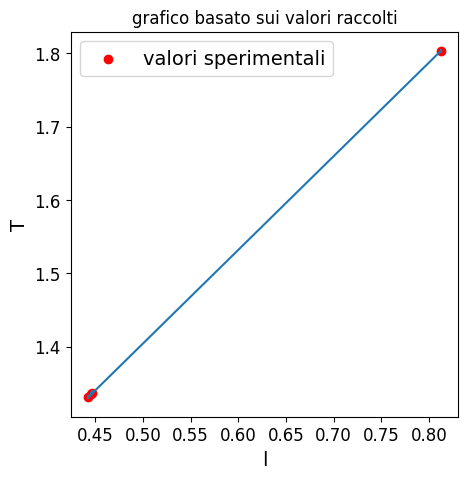

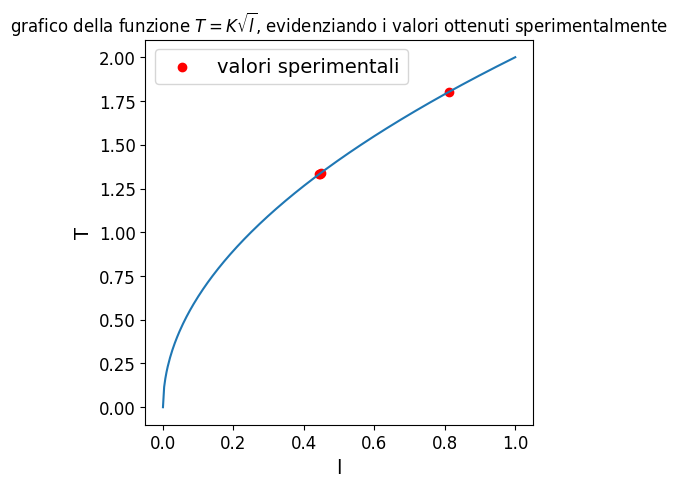

In [26]:
#grafico K
valx = np.linspace(0, 1, 300)
def Tteorico(valx):
  (params[0])*np.sqrt(valx)
  return  (params[0])*np.sqrt(valx)
#graph limitato
fig, ax = plt.subplots( figsize=(5,5) )
plt.title('grafico basato sui valori raccolti')
plt.errorbar(l_med,f1(l_med,params), yerr=params_err)
plt.xlabel('l', fontsize=14)
plt.ylabel('T', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
highlight_x = [l1m3_med, l2m3_med, l3m1_med, l4m2_med]
highlight_T = [2 * np.sqrt(x) for x in highlight_x]

plt.scatter(highlight_x, highlight_T, color='red', label='valori sperimentali')
plt.legend(fontsize=14)
plt.show()

#graph curva completa
fig, ax = plt.subplots( figsize=(5,5) )
plt.title('grafico della funzione $T = K\sqrt{l}$, evidenziando i valori ottenuti sperimentalmente')
plt.errorbar(valx, Tteorico(valx))
plt.xlabel('l', fontsize=14)
plt.ylabel('T', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
highlight_x = [l1m3_med, l2m3_med, l3m1_med, l4m2_med]
highlight_T = [2 * np.sqrt(x) for x in highlight_x]

plt.scatter(highlight_x, highlight_T, color='red', label='valori sperimentali')

plt.legend(fontsize=14)
plt.show()



Poichè il grafico disegnato utilizzando la funzione plot riceve in input solo pochi valori e tutti molto ravvicinati, la funzione sembrerebbe avere un andamento lineare, quindi per rendere più chiaro l' andamento della funzione radice quadrata abbiamo scelto di rappresentare un secondo grafico fornendo in input una mole più ampia di valori ed evidenziando quelli a nostra disposizione con il colore rosso

In [24]:
#Calcolo g e relativa incertezza
g = (2 * np.pi / params) ** 2

def g1(k):
    return (2 * np.pi / k) ** 2

k = sp.Symbol('k')
dgdk = sp.diff(g1(k), k)
derivative = dgdk.subs(k, params[0])
inc_g = abs(derivative) * params_err

# Stampa i risultati
print("La miglior stima di g secondo i dati sperimentali è:")
for i in range(len(g)):
    print("g[{}]= {:.4f} +- {:.4f}".format(i, g[i], inc_g[i]))

La miglior stima di g secondo i dati sperimentali è:
g[0]= 9.8652 +- 0.0265


In [25]:
# calcolo chi2 ridotto
y1_fit = f1(l_med, params[0])
squred_error = (np.power((y1_fit - T_med), 2))/ T_sdom
chi2_ = squred_error.sum()
print("chi2 = {:.4f}".format(chi2_))
chi2_r=chi2_/(len(l_med)-1)
print("chi2 ridotto = {:.4f}".format(chi2_r))
p_value = chi2.sf(chi2_, (len(l_med)-1))
print("prob_chi2  = {:.4f}".format(p_value*100),"%")

chi2 = 0.0191
chi2 ridotto = 0.0064
prob_chi2  = 99.9301 %


CONCLUSIONI

Con l'aiuto dell'analisi dei dati è possibile discutere i risultati dell'esperimento. Procederemo in ordine trattando in primo luogo l'indipendenza del periodo dalla massa per poi procedere con la dipendenza del periodo dalla lunghezza del braccio e concludendo con la discussione della miglior stima dell'accelerazione gravitazionale.
Abbiamo supposto che fosse presente una relazione di dipendenza fra le lunghezze del braccio del pendolo e i rispettivi periodi misurati, e al contempo che non ci fosse nessuna relazione tra le masse e i periodi.
Per verificare queste nostre ipotesi abbiamo considerato la legge: $T = K\sqrt{l}$, Dove K rappresenta una costante. Inizialmente è stato scelto un angolo di pari a 10 gradi ma a causa dell'approssimazione dei piccoli angoli risultava esserci un errore troppo grande rispetto a quello sul periodo e sulla lunghezza del filo, perciò abbiamo deciso di utilizzare un angolo di 5 gradi che è risultato avere un'incertezza adatta per l' esperienza. Grazie alle misure fatte risulta che variando la massa, la misura di K non varia mentre variando la lunghezza del filo la misura di K resta invariata. Ciò significa che il periodo non dipende dalla massa e che viceversa dipende dalla lunghezza. Questa conclusione è rafforzata grazie al calcolo del ${\tilde\chi}^2$ che sembra dare conferma di quanto ipotizzato. Partendo dalle conclusioni fatte in precedenza e utilizzando la formula fornita dalle dispense possiamo trovare la misura di g:   $g=(\frac{2\pi}{K})^2$ Il valore di K è stato ricavato utilizzando la regressione lineare. La misura di g che ne risulta è confrontabile con quella che viene considerata per convenzione la misura di g. Anche in questo caso il calcolo del ${\tilde\chi}^2$ sembra dare conferma di quanto concluso.